# Smartwatch Data Analysis

In [2]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd        # Pandas: powerful data manipulation library
import numpy as np         # NumPy: fundamental package for scientific computing
import matplotlib.pyplot as plt    # Matplotlib: plotting library for creating static, interactive, and animated visualizations
import plotly.express as px        # Plotly Express: easy-to-use interface for creating interactive plots
import plotly.graph_objects as go  # Plotly Graph Objects: provides more control over plots with a lower-level interface

In [4]:
# Load the daily activity data from the CSV file into a Pandas DataFrame.
data = pd.read_csv("dailyActivity_merged.csv")

# Display the first few rows of the DataFrame to get a glimpse of the data.
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [5]:
# Displaying concise summary information about the DataFrame 'data'
# including column data types, non-null counts, and memory usage.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
# Converting the datatype of 'ActivityDate' column to datetime format for better time handling.
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"],
                                      format="%m/%d/%Y")

# Printing concise information about the DataFrame to verify the changes.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
# Calculating the total minutes spent across various activity levels.
data["TotalMinutes"] = (
    data["VeryActiveMinutes"] +
    data["FairlyActiveMinutes"] +
    data["LightlyActiveMinutes"] +
    data["SedentaryMinutes"]
)

# Sampling a random subset of total minutes data to analyze.
print(data["TotalMinutes"].sample(5))


704    1016
575     989
245    1440
212     944
37     1440
Name: TotalMinutes, dtype: int64


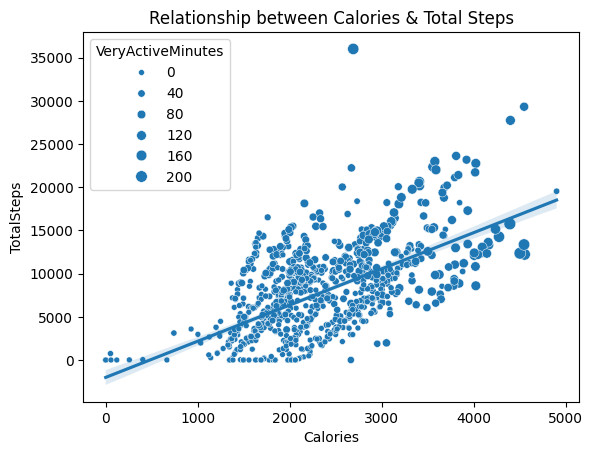

In [10]:
#Relationship between Calories and Total Steps

import seaborn as sns

# Visualizing the relationship between Calories and Total Steps with Seaborn.
sns.scatterplot(data=data, x="Calories", y="TotalSteps", size="VeryActiveMinutes")

# Adding a trendline using Ordinary Least Squares regression.
sns.regplot(data=data, x="Calories", y="TotalSteps", scatter=False)

# Adding title to the plot.
plt.title("Relationship between Calories & Total Steps")

# Displaying the plot.
plt.show()


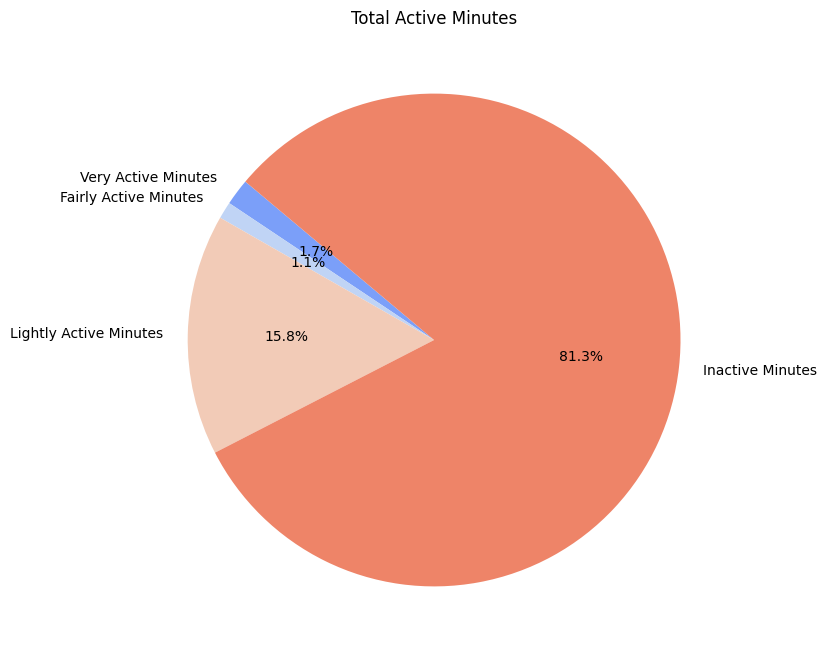

In [12]:
import matplotlib.pyplot as plt

# Calculating the mean of different activity minutes.
activity_counts = data[["VeryActiveMinutes", "FairlyActiveMinutes",
                       "LightlyActiveMinutes", "SedentaryMinutes"]].mean()

# Labels for the pie chart.
labels = ["Very Active Minutes", "Fairly Active Minutes",
          "Lightly Active Minutes", "Inactive Minutes"]

# Generating a gradient of colors.
colors = sns.color_palette("coolwarm", n_colors=len(labels))

# Creating a pie chart using Seaborn.
plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Adding title to the plot.
plt.title('Total Active Minutes')

# Displaying the plot.
plt.show()


## Observations:

- 81.3% of Total inactive minutes in a day
- 15.8% of Lightly active minutes in a day
- On an average, only 21 minutes (1.74%) were very active
- and 1.11% (13 minutes) of fairly active minutes in a day

In [21]:
# Extracting the day name from the 'ActivityDate' column
data["Day"] = data["ActivityDate"].dt.day_name()

# Printing the first few entries of the 'Day' column to display the extracted day names
print(data["Day"].head())


0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


In [25]:
fig = go.Figure()

# Adding Very Active minutes data as a bar trace with customized color and name
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='#FF5733'  # Customizing the marker color
))

# Adding Fairly Active minutes data as a bar trace with customized color and name
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='#33FF6E'  # Customizing the marker color
))

# Adding Lightly Active minutes data as a bar trace with customized color and name
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='#3388FF'  # Customizing the marker color
))

# Updating the layout to set the group bar mode and adjust x-axis tick angles
fig.update_layout(
    barmode='group',  # Setting the bar mode to group
    xaxis_tickangle=-45,  # Rotating x-axis ticks for better readability
    title="Activity Minutes by Day",  # Adding a title to the plot
    xaxis_title="Day",  # Adding a label to the x-axis
    yaxis_title="Minutes",  # Adding a label to the y-axis
    legend_title="Activity Type",  # Adding a title to the legend
    legend=dict(x=0, y=1.0)  # Positioning the legend
)

# Displaying the plot
fig.show()